# Covid Status
This Data Science project by Sven Oberwalder and Yasin Sahin analyzes the development of the corona pandemic based on input data provided by Statistik Austria

The Datasets can be found here:
### [Dataset 1](https://data.statistik.gv.at/web/meta.jsp?dataset=OGD_covidggstatus2_GGSTATUS_2)

### [Dataset 2](https://data.statistik.gv.at/web/meta.jsp?dataset=OGD_covidggstatus_GGSTATUS_1)

In [198]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Initial Data Analysis and Import
Dataset 1 has following attributes:
* **C-BEZIMST-0** Politischer Bezirk (PolBez)
* **C-ALTGRIMST-0** 10-years age group (Altersgr)
* **C-GLIMST-0** Country of Birth (GebLand)
* **C-C11-0** Sex (Geschl)
* **C-IMST-0** COVID-19 vaccinated-recovered-status (GeimpftGenesen)
* **F-DATA** Number of records (Anz)

Dataset 2 has following attributes:
* **C-B00-0** Federal country (Bundesland)
* **C-BILIMST-0** Education (Bildung)
* **C-ALTGRIMST-0** 10-years age group (Altersgr)
* **C-ESIMST-0** Economic status (ErwerbStatus)
* **C-IMST-0** COVID-19 vaccinated-recovered-status (GeimpftGenesen)
* **F-DATA** Number of records (Anz)

In below code, the datasets need to be imported and the attributes must be renamed to more meaningful names. Since the data is separated by semi-colons (;), we need to specify that when importing the csv-files. Furthermore, a simple Std-Analysis has to be conducted, to ensure the progress.

In [199]:
#import databases
dataset1 = pd.read_csv("./data/dataset1.csv", sep=";")
dataset2 = pd.read_csv("./data/dataset2.csv", sep=";")

#rename attributes
dataset1.rename(columns={"C-BEZIMST-0": "PolBez",
                         "C-ALTGRIMST-0": "Altersgr",
                         "C-GLIMST-0": "GebLand",
                         "C-C11-0": "Geschl",
                         "C-IMST-0": "GeimpftGenesen",
                         "F-DATA": "Anz"}, inplace=True)
dataset2.rename(columns={"C-B00-0": "Bundesland",
                         "C-BILIMST-0": "Bildung",
                         "C-ALTGRIMST-0": "Altersgr",
                         "C-ESIMST-0": "ErwerbStatus",
                         "C-IMST-0": "GeimpftGenesen",
                         "F-DATA": "Anz"}, inplace=True)


## Std-Analysis for Dataset 1

In [200]:
dataset1.sample(5)

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Anz
37540,BEZIMST-708,ALT10IMST-4,GLIMST-2,C11-2,IMST-2,113
9232,BEZIMST-304,ALTGRIMST-14,GLIMST-2,C11-1,IMST-1,104
13434,BEZIMST-314,ALTGRIMST-4,GLIMST-2,C11-2,IMST-2,5
26627,BEZIMST-502,ALTGRIMST-15,GLIMST-2,C11-2,IMST-3,16
47801,BEZIMST-919,ALTGRIMST-3,GLIMST-1,C11-2,IMST-1,368


We immediately recognize that all values have a certain code (Except for Anz)

In [201]:
dataset1.head(5)

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Anz
0,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-1,IMST-1,1
1,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-1,IMST-3,80
2,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-1,IMST-4,216
3,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-2,IMST-1,2
4,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-2,IMST-3,86


In [202]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53961 entries, 0 to 53960
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PolBez          53961 non-null  object
 1   Altersgr        53961 non-null  object
 2   GebLand         53961 non-null  object
 3   Geschl          53961 non-null  object
 4   GeimpftGenesen  53961 non-null  object
 5   Anz             53961 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


There are no null-values for this dataset, which is positive for future analysis.

In [203]:
dataset1.describe()

,Anz
count,53961.000000
mean,642.049703
std,2171.148389
min,1.000000
25%,44.000000
50%,169.000000
75%,508.000000
max,70338.000000


## Std-Analysis for Dataset 2

In [204]:
dataset2.sample(5)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
1072,B00-7,BILIMST-99,ALT10IMST-5,ESIMST-2,IMST-2,2
1319,B00-9,BILIMST-3,ALT10IMST-5,ESIMST-1,IMST-4,4687
329,B00-3,BILIMST-1,ALT10IMST-7,ESIMST-1,IMST-1,9961
880,B00-6,BILIMST-4,ALT10IMST-5,ESIMST-1,IMST-2,10394
1307,B00-9,BILIMST-2,ALT10IMST-7,ESIMST-2,IMST-4,8013


Same here: Every value is its own code and needs to be converted, to understand the dataset better.

In [205]:
dataset2.head(5)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
0,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-1,611
1,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-2,285
2,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-3,396
3,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-4,472
4,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-2,IMST-1,471


In [206]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Bundesland      1404 non-null   object
 1   Bildung         1404 non-null   object
 2   Altersgr        1404 non-null   object
 3   ErwerbStatus    1404 non-null   object
 4   GeimpftGenesen  1404 non-null   object
 5   Anz             1404 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 65.9+ KB


No null-values in this dataset too.

In [207]:
dataset2.describe()

,Anz
count,1404.000000
mean,3414.423789
std,5746.310880
min,1.000000
25%,310.500000
50%,1375.500000
75%,3926.000000
max,55581.000000


# Data Cleaning
In this section, the input data will be cleaned. For this manner, any wrong, missing, or irrelevant informations will be treated accordingly.

**To Be marked**
The Column ``Altersgr`` uses an age gap interval of 10 years to inform us about the age of the adresses person. However, the first interval currently named ``ALT10IMST-1`` only has a 5 year gap (from 0 - 4 years) to especially adress babys and small children

### Dataset 1

There is already a csv which helps us convert these codes into values we can understand. The reason we do not import these values from the csv directly, is that the values are too long. We hereby keep the values steady and simple.
* ``GeimpftGenesen`` is converted into more meaningful names
* For ``Altersgr`` we type in the exact age group
* For ``GebLand``: ``GLIMST-1`` stands for people born in Austria, and ``GLIMST-1`` for people born outside of Austria
* ``Geschl`` is also being converted into m (male) and f (female)

In [208]:
bundeslandDict = {
    "B00-1": "Burgenland",
    "B00-2": "Kärnten",
    "B00-3": "Niederösterreich",
    "B00-4": "Oberösterreich",
    "B00-5": "Salzburg",
    "B00-6": "Steiermark",
    "B00-7": "Tirol",
    "B00-8": "Vorarlberg",
    "B00-9": "Wien"
}

geimpftGenesenDict = {"IMST-4": "NICHTS",  #nothing (NICHTS)
                       "IMST-1": "IMPF",  #vaccinated (geIMPFt)
                       "IMST-3": "GEN",  #recovered (GENesen)
                       "IMST-2": "IMPF + GEN"} #vaccinated + recovered (geIMPFt und GENesen)

ageGapDict = {"ALT10IMST-1": "0 - 4",
              "ALT10IMST-2": "5 - 14",
              "ALT10IMST-3": "15 - 24",
              "ALT10IMST-4": "25 - 34",
              "ALT10IMST-5": "35 - 44",
              "ALT10IMST-6": "45 - 54",
              "ALT10IMST-7": "55 - 64",
              "ALT10IMST-8": "65 - 74",
              "ALT10IMST-9": "75 - 84",
              "ALT10IMST-10": "85+"}

dataset1["GebLand"] = dataset1["GebLand"].map({"GLIMST-1": "INLAND",
                                               "GLIMST-2": "AUSLAND"})

dataset1["Geschl"] = dataset1["Geschl"].map({"C11-1": "m",
                                             "C11-2": "f"})

dataset1["GeimpftGenesen"] = dataset1["GeimpftGenesen"].map(geimpftGenesenDict)

dataset1["Altersgr"] = dataset1["Altersgr"].map(ageGapDict)

dataset1.sample(10)

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Anz
30674,BEZIMST-611,55 - 64,AUSLAND,f,IMPF,264
11987,BEZIMST-310,35 - 44,INLAND,f,IMPF,1063
28560,BEZIMST-601,NaN,INLAND,f,NICHTS,4934
10040,BEZIMST-306,NaN,INLAND,m,GEN,429
660,BEZIMST-199,NaN,INLAND,m,GEN,11
9736,BEZIMST-305,NaN,AUSLAND,m,IMPF + GEN,7
5999,BEZIMST-206,75 - 84,INLAND,m,NICHTS,294
41005,BEZIMST-903,5 - 14,INLAND,m,GEN,1086
47208,BEZIMST-917,15 - 24,AUSLAND,f,IMPF + GEN,130
12842,BEZIMST-312,25 - 34,AUSLAND,m,IMPF + GEN,101


### Dataset 2

In [209]:
dataset2["Bundesland"] = dataset2["Bundesland"].map(bundeslandDict)

#uses the dictionary geimpftGenesenDict from the previous code block
dataset2["GeimpftGenesen"] = dataset2["GeimpftGenesen"].map(geimpftGenesenDict)

dataset2["Bildung"] = dataset2["Bildung"].map({"BILIMST-1": "Pflichtschule",
                                               "BILIMST-2": "Lehrabschluss/BMS",
                                               "BILIMST-3": "BHS/AHS/Kolleg",
                                               "BILIMST-4": "Akademie/Hochschule",
                                               "BILIMST-99": "Unknown"})

dataset2["ErwerbStatus"] = dataset2["ErwerbStatus"].map({"ESIMST-1": "aktiv",
                                                         "ESIMST-2": "inaktiv"})

#uses the dictionary ageGapDict from the previous code block
dataset2["Altersgr"] = dataset2["Altersgr"].map(ageGapDict)

dataset2.sample(10)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
448,Niederösterreich,Unknown,35 - 44,inaktiv,NICHTS,17
1038,Tirol,Akademie/Hochschule,35 - 44,aktiv,NICHTS,1889
616,Oberösterreich,Unknown,55 - 64,inaktiv,NICHTS,15
339,Niederösterreich,Lehrabschluss/BMS,25 - 34,aktiv,GEN,16738
1070,Tirol,Unknown,35 - 44,aktiv,NICHTS,7
1364,Wien,Akademie/Hochschule,55 - 64,aktiv,IMPF,23415
525,Oberösterreich,BHS/AHS/Kolleg,25 - 34,aktiv,IMPF,9859
105,Burgenland,Akademie/Hochschule,35 - 44,aktiv,IMPF + GEN,2336
807,Steiermark,Lehrabschluss/BMS,25 - 34,aktiv,IMPF,18993
996,Tirol,BHS/AHS/Kolleg,25 - 34,aktiv,IMPF + GEN,4212


## Duplicate Data

In [210]:
dataset1["Anz"].sum()

34645644

In the above code we can see that the sum of records is approximately 4 times the total population of Austria. This strongly suggests that there may be duplicate data. And exactly that is the case: In ``PolBez`` there are records for each province and also for each federal country. This duplicate is not necessary, since one province can easily be assigned to its federal country (e.g. ``BEZIMST-304`` (= Wiener Neustadt) must be in ``B00-3`` (=Niederoesterreich)). So the records for the federal countries can be removed.

In [211]:
dataset1 = dataset1.loc[dataset1["PolBez"].map(lambda val: "BEZIMST" in val)] #only provinces have the prefix BEZIMST

Instead, we can add a new feature providing information about the federal country.

In [212]:
dataset1["Bundesland"] = dataset1["PolBez"].map(lambda val: "B00-" + val[8]).map(bundeslandDict)

dataset1["Anz"].sum()

17322822

The above code still returns an amount which is twice as big as Austria's population. Similarly, the column ``Altersgr`` has duplicate records for different age groups. Previously we mapped `Altersgr` to more readable strings, but left out the duplicate values that will be deleted in the next step. So we can simply drop the N/A records that emerge after mapping the column ``Altersgr``.

In [213]:
dataset1 = dataset1.dropna()
dataset1["Anz"].sum()

8661411

Now we have removed all duplicate values. Let's continue cleaning our data.
## Null Values

In [214]:
dataset1.isnull().sum()

PolBez            0
Altersgr          0
GebLand           0
Geschl            0
GeimpftGenesen    0
Anz               0
Bundesland        0
dtype: int64

In [215]:
dataset2.isnull().sum()

Bundesland        0
Bildung           0
Altersgr          0
ErwerbStatus      0
GeimpftGenesen    0
Anz               0
dtype: int64

Since there are no null values, we are done cleaning our data and can save it into two datasets. ``korr1.csv`` for ``dataset1.csv`` and ``korr2.csv`` for ``dataset2.csv``

In [216]:
dataset1.to_csv("./output/korr1.csv", sep=";", index=False)
dataset2.to_csv("./output/korr2.csv", sep=";", index=False)

Now, lets look at our corrected values...

In [217]:
korr1 = pd.read_csv("./output/korr1.csv", sep=";")
korr2 = pd.read_csv("./output/korr2.csv", sep=";")

korr1.head(5)

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Anz,Bundesland
0,BEZIMST-101,0 - 4,INLAND,m,IMPF,1,Burgenland
1,BEZIMST-101,0 - 4,INLAND,m,GEN,80,Burgenland
2,BEZIMST-101,0 - 4,INLAND,m,NICHTS,216,Burgenland
3,BEZIMST-101,0 - 4,INLAND,f,IMPF,2,Burgenland
4,BEZIMST-101,0 - 4,INLAND,f,GEN,86,Burgenland


In [218]:
korr2.head(5)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
0,Burgenland,Pflichtschule,25 - 34,aktiv,IMPF,611
1,Burgenland,Pflichtschule,25 - 34,aktiv,IMPF + GEN,285
2,Burgenland,Pflichtschule,25 - 34,aktiv,GEN,396
3,Burgenland,Pflichtschule,25 - 34,aktiv,NICHTS,472
4,Burgenland,Pflichtschule,25 - 34,inaktiv,IMPF,471


# Data Preparation
## Numerical Values
### Dataset 1
* For ``Polbez`` we take the number in the value code (so ``BEZIMST-340`` will be converted into ``340``)
* For ``Altersgr`` we take the mean value from the min and max of the age group (except for 85, it will stay 85 since there is no max)
* For ``GebLand`` we take 0 for ``INLAND`` and 1 for ``AUSLAND``
* For ``Geschl`` we take 0 for ``m`` and 1 for ``f``
* For ``GeimpftGenesen`` we take 0 for ``nothing``, 1 for vaccinated, 2 for recovered, and 3 (1+2) for both vaccinated and recovered
* For ``Bundesland`` we should consider looking at the ``PolBez`` once more: As we already know, the first digit of the PolBez corresponds to the ``Bundesland``. Because of this, we should keep these numbers for the sake of having consistent values. (If we look closer, we can also see that the states are numbered alphabetically so that's also what we are going to do (: )


In [219]:
num1 = pd.DataFrame()

altersgrToNumeric = {"0 - 4": 2.0,
                     "5 - 14": 9.5,
                     "15 - 24": 19.5,
                     "25 - 34": 29.5,
                     "35 - 44": 39.5,
                     "45 - 54": 49.5,
                     "55 - 64": 59.5,
                     "65 - 74": 69.5,
                     "75 - 84": 79.5,
                     "85+": 85.0}

geimpftGenesenToNumeric = {"NICHTS": 0,  #nothing
                      "IMPF": 1,  #vacc
                      "GEN": 2,  #recov
                      "IMPF + GEN": 3} #vacc + recov

geblandToNumeric = dict((v, k) for k, v in enumerate(korr1["GebLand"].unique()))
geschlToNumeric = dict((v, k) for k, v in enumerate(korr1["Geschl"].unique()))
bundeslandToNumeric = dict((v, k + 1) for k, v in enumerate(np.sort(korr2["Bundesland"].unique())))

num1["PolBez"] = korr1["PolBez"].map(lambda val: int(val[-3:]))
num1["Altersgr"] = korr1["Altersgr"].map(altersgrToNumeric)
num1["GebLand"] = korr1["GebLand"].map(geblandToNumeric)
num1["Geschl"] = korr1["Geschl"].map(geschlToNumeric)
num1["GeimpftGenesen"] = korr1["GeimpftGenesen"].map(geimpftGenesenToNumeric)
num1["Bundesland"] = korr1["Bundesland"].map(bundeslandToNumeric)
num1["Anz"] = korr1["Anz"]

num1.sample(5)


,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Bundesland,Anz
16536,916,59.5,1,0,1,9,1442
11152,614,79.5,1,1,1,6,41
4549,312,79.5,0,0,0,3,146
12789,705,49.5,1,1,3,7,335
16493,916,29.5,1,1,3,9,642


Let's look if our values are truly numerical:

In [220]:
num1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17694 entries, 0 to 17693
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PolBez          17694 non-null  int64  
 1   Altersgr        17694 non-null  float64
 2   GebLand         17694 non-null  int64  
 3   Geschl          17694 non-null  int64  
 4   GeimpftGenesen  17694 non-null  int64  
 5   Bundesland      17694 non-null  int64  
 6   Anz             17694 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 967.8 KB


So far so good: Everything's an int64 or float64, so we can do the same thing for dataset 2.

### Dataset 2
For ``Altersgr``, ``Bundesland``, and ``GeimpftGenesen`` we used the same dict as above to map our values to numerical ones.
* For ``ErwerbStatus`` we take 0 for inactive and 1 for active (common values to symbolize true/false)
* For ``Bildung`` we are going to order the values from 0-4 (lowest graduation-highest graduation)

In [221]:
num2 = pd.DataFrame()


erwerbstatusToNumeric = {"inaktiv": 0, "aktiv": 1}

bildungToNumeric = {"Unknown": 0, "Pflichtschule": 1, "Lehrabschluss/BMS": 2, "BHS/AHS/Kolleg": 3, "Akademie/Hochschule": 4}

num2["Bundesland"] = korr2["Bundesland"].map(bundeslandToNumeric)
num2["Bildung"] = korr2["Bildung"].map(bildungToNumeric)
num2["Altersgr"] = korr2["Altersgr"].map(altersgrToNumeric)
num2["ErwerbStatus"] = korr2["ErwerbStatus"].map(erwerbstatusToNumeric)
num2["GeimpftGenesen"] = korr2["GeimpftGenesen"].map(geimpftGenesenToNumeric)
num2["Anz"] = korr2["Anz"]

num2.sample(5)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
1242,8,0,59.5,0,1,5
573,4,4,49.5,1,1,13124
27,1,1,59.5,1,0,385
1039,7,4,39.5,0,1,1072
1304,9,2,59.5,0,1,27251


We need to check again if the values are all numeric:

In [222]:
num2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bundesland      1404 non-null   int64  
 1   Bildung         1404 non-null   int64  
 2   Altersgr        1404 non-null   float64
 3   ErwerbStatus    1404 non-null   int64  
 4   GeimpftGenesen  1404 non-null   int64  
 5   Anz             1404 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 65.9 KB


So let's save these numerical values into different csv-files.

In [223]:
num1.to_csv("./output/num1.csv", index=False)
num2.to_csv("./output/num2.csv", index=False)

## Normalized Values
In this section, we will adjust our numerical values so that all of them are in the range of 0 - 1 (each column). First, we need to import the csv with the numerical data.

In [224]:
num1 = pd.read_csv("./output/num1.csv")
num2 = pd.read_csv("./output/num2.csv")

Let's apply our formula to get normalized values from 0 to 1:

In [225]:
norm1 = (num1 - num1.min()) / (num1.max() - num1.min())
norm2 = (num2 - num2.min()) / (num2.max() - num2.min())

Let's see if all of these values are within 0 and 1 with a simple pandas function:

In [226]:
norm1.describe()

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Bundesland,Anz
count,17694.000000,17694.000000,17694.000000,17694.000000,17694.000000,17694.000000,17694.000000
mean,0.508211,0.525914,0.488584,0.501187,0.492012,0.510456,0.054846
std,0.318163,0.323962,0.499884,0.500013,0.372839,0.327328,0.081404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256691,0.210843,0.000000,0.000000,0.000000,0.250000,0.005838
50%,0.383212,0.572289,0.000000,1.000000,0.333333,0.375000,0.023802
75%,0.738443,0.813253,1.000000,1.000000,0.666667,0.750000,0.071180
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking good so far. Every min is 0 and every max is 1 (which was our goal). Now let's check norm2, too.

In [227]:
norm2.describe()

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
count,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,0.504006,0.512821,0.493115,0.499288,0.491690,0.061415
std,0.322200,0.348880,0.371470,0.500178,0.372293,0.103388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000000,0.000000,0.000000,0.005569
50%,0.500000,0.500000,0.333333,0.000000,0.333333,0.024730
75%,0.750000,0.750000,0.666667,1.000000,0.666667,0.070619
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now, it's time to save these datasets once more as ``norm1.csv`` and ``norm2.csv``.

In [228]:
norm1.to_csv("./output/norm1.csv", index=False)
norm2.to_csv("./output/norm2.csv", index=False)

## Nominal Values
In this section we will convert the values to only ordinal or nominal values and therefore get rid of any metric values. First, let's look at dataset 1.
### Dataset 1
We can actually keep the values in ``PolBez``, ``Altersgr``, ``GebLand``, ``Geschl``, ``GeimpftGenesen``, and ``Bundesland`` as they are from korr1 dataframe. For ``Anz`` however, we need to define a limit. Everything under this limit will be considered "low" (``WENIG``) and everything above (incl. the limit) is considered "high" (``VIEL``). Let's take the median value as the limit, so that (approx.) 50% of the values are "low" and 50% are "high".

In [229]:
nom1 = pd.DataFrame()

nom1["PolBez"] = korr1.PolBez
nom1["Altersgr"] = korr1.Altersgr
nom1["GebLand"] = korr1.GebLand
nom1["Geschl"] = korr1.Geschl
nom1["GeimpftGenesen"] = korr1.GeimpftGenesen
nom1["Bundesland"] = korr1.Bundesland

anzLimit1 = korr1["Anz"].median()
nom1["Anz"] = korr1["Anz"].map(lambda x: "WENIG" if x < anzLimit1 else "VIEL")

nom1.sample(5)

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Bundesland,Anz
9501,BEZIMST-503,0 - 4,AUSLAND,m,NICHTS,Salzburg,WENIG
6207,BEZIMST-323,55 - 64,INLAND,m,NICHTS,Niederösterreich,VIEL
6251,BEZIMST-323,75 - 84,AUSLAND,f,NICHTS,Niederösterreich,WENIG
17156,BEZIMST-920,45 - 54,AUSLAND,f,NICHTS,Wien,VIEL
14729,BEZIMST-905,5 - 14,INLAND,m,IMPF + GEN,Wien,WENIG


### Dataset 2
Like the previous dataframe, we can leave ``Bundesland``, ``Bildung``, ``ErwerbStatus``, and ``GeimpftGenesen`` from korr2 dataframe unchanged:

In [230]:
nom2 = pd.DataFrame()

nom2["Bundesland"] = korr2.Bundesland
nom2["Bildung"] = korr2.Bildung
nom2["Altersgr"] = korr2.Altersgr
nom2["ErwerbStatus"] = korr2.ErwerbStatus
nom2["GeimpftGenesen"] = korr2.GeimpftGenesen

anzLimit2 = korr2["Anz"].median()
nom2["Anz"] = korr2["Anz"].map(lambda x: "WENIG" if x < anzLimit2 else "VIEL")

nom2.sample(5)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
497,Oberösterreich,Lehrabschluss/BMS,25 - 34,inaktiv,IMPF,VIEL
774,Salzburg,Unknown,55 - 64,inaktiv,NICHTS,WENIG
1319,Wien,BHS/AHS/Kolleg,35 - 44,aktiv,NICHTS,VIEL
591,Oberösterreich,Unknown,25 - 34,aktiv,GEN,WENIG
596,Oberösterreich,Unknown,25 - 34,inaktiv,NICHTS,WENIG


# Visualization with Seaborn
## Color Palette
Color palettes are essential when it comes to visualization. We should define a color palette for categorical data (nominal).

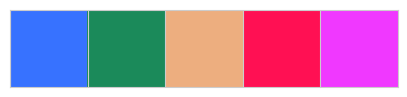

In [231]:
colors = ["#3772FF", "#1b8a5a", "#edae7f", "#FF1053", "#F038FF"]
cat_palette = sns.color_palette(colors)
sns.palplot(cat_palette)
plt.show()

We should also define a palette for "continuous" data (such as when depicting a heatmap). I really like the predefined "flare" palette, which is also a gradient when defining ``as_cmap=True``.

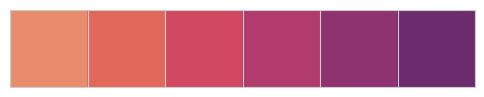

In [232]:
cont_palette = sns.color_palette("flare", as_cmap=True)
sns.palplot(sns.color_palette("flare"))
plt.show()

## Correlation
Let us detect some correlation between our values. Since numerical values are better for clustering and finding correlation, we can use our num dataframes to detect some correlation. We should at least see a correlation between the features ``PolBez`` and ``Bundesland`` from num1, right?

In [233]:
num1.corr()

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Bundesland,Anz
PolBez,1.000000,-0.007576,0.003521,-0.000854,0.004618,0.999188,0.082690
Altersgr,-0.007576,1.000000,0.024892,0.002802,0.029775,-0.007483,-0.056352
GebLand,0.003521,0.024892,1.000000,0.002542,-0.008020,0.003579,-0.407700
Geschl,-0.000854,0.002802,0.002542,1.000000,0.000051,-0.000896,0.012189
GeimpftGenesen,0.004618,0.029775,-0.008020,0.000051,1.000000,0.004582,-0.091159
Bundesland,0.999188,-0.007483,0.003579,-0.000896,0.004582,1.000000,0.082894
Anz,0.082690,-0.056352,-0.407700,0.012189,-0.091159,0.082894,1.000000


Well we were right with Bundesland, but with all these numbers, it sure looks complicated... Let's use colors instead!

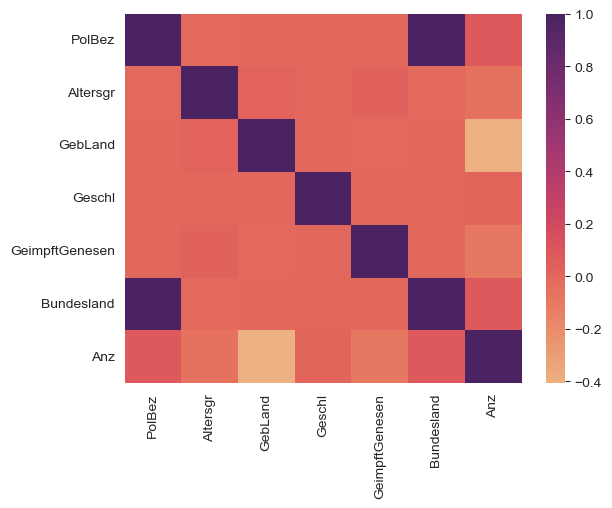

In [234]:
sns.heatmap(num1.corr(), cmap=cont_palette)
plt.show()

This suggests that there is no concrete correlation except for ``Bundesland`` and ``PolBez``. Except that, there is also a slight "color change" between ``Anz`` and ``GebLand``. Let's look at that more closely:

In [235]:
num1["Anz"].corr(num1["GebLand"])

-0.40769994363327966

This value suggests that the amount of people getting vaccinated/recovered/or both depends on where you have been born. But to be sure, you have to look at the causality here: We do not think that the mere amount (--> without any information whether the number of people is vaccinated/recovered/both/none) is not dependent on where you are coming from. Maybe this value is being produced, since there are more people born in Austria and currently living in Austria. This would lead to a bigger number in the column ``Anz`` for people who are born in Austria (and vice versa). The fact that the value is negative even supports my argumentation (``INLAND`` has smaller value (0), ``Anz`` having higher value --> negative correlation)

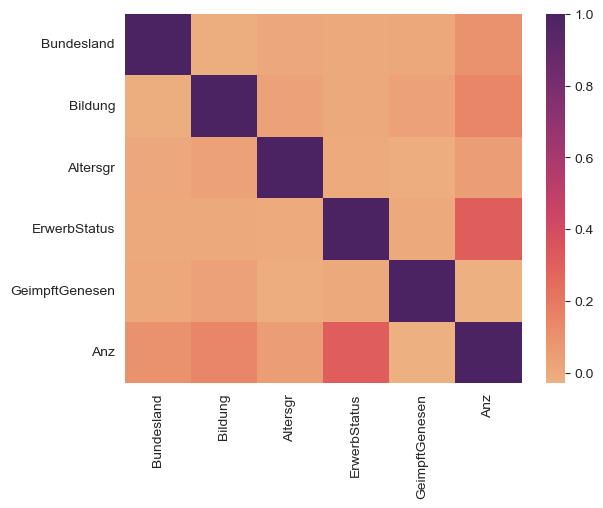

In [236]:
sns.heatmap(num2.corr(), cmap=cont_palette)
plt.show()

Well we see more saturated cells than above when it comes to other features (but not that obvious). We sure can see in both graphs very slight correlations (<0.1). For example between ``Bildung`` and ``GeimpftGenesen``. This might suggest that the education might have something to do with people getting vaccinated. There is also the fact that ``Bildung`` correlates with ``Anz``, too, which also supports the argument that there might be a connection. There is also a higher saturation between ``Anz`` and ``Erwerbstatus`` which might suggest that there is a connection, too. But as above, without any additional information, this correlation lacks causality.

## Pairplot

C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

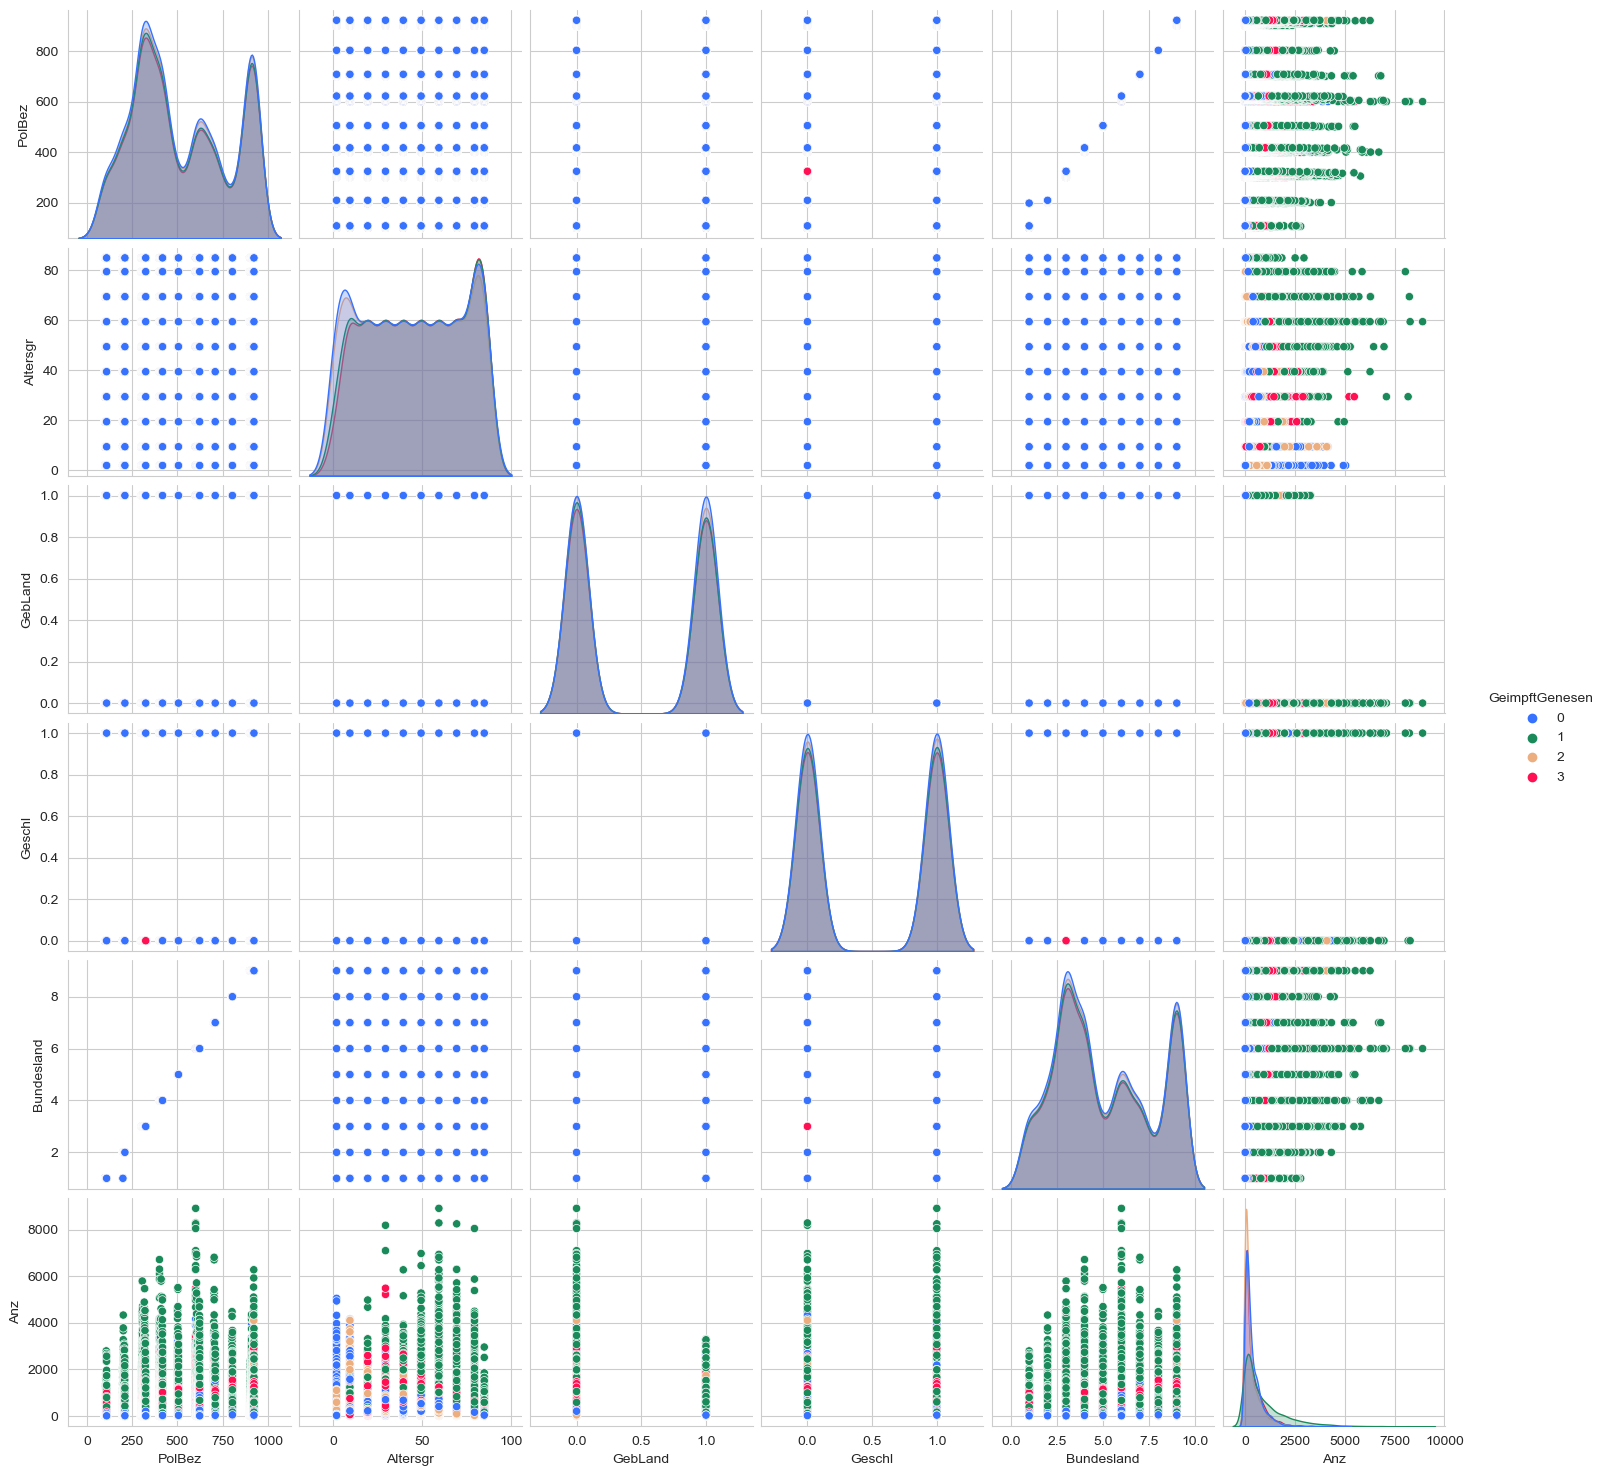

In [237]:
sns.pairplot(num1, hue="GeimpftGenesen", palette=cat_palette[0:4])
plt.show()

Well this is the backlash you get when your dataset has too many nominal/ordinal values. In the above diagram you cannot really see certain groupings, clusters, or anything similar. This is because there are too many nominal/ordinal values and pairplots (scatterplots to be exact) work much better between two metric features (e.g. Length and Width).

C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

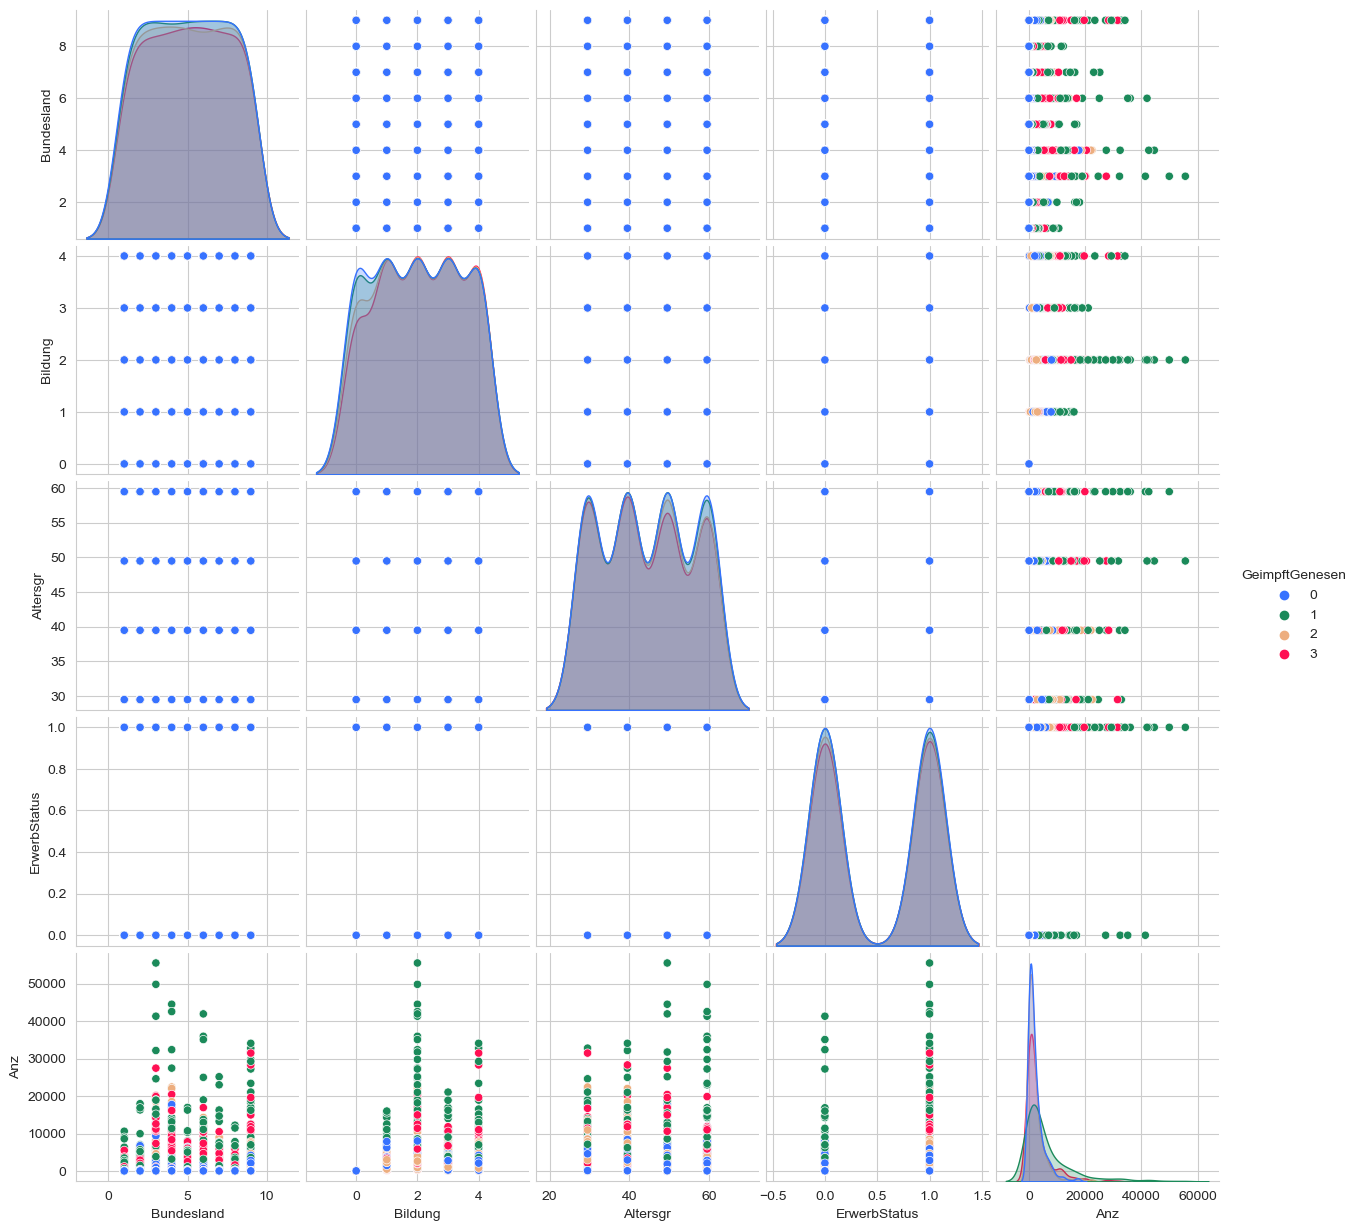

In [238]:
sns.pairplot(num2, hue="GeimpftGenesen", palette=cat_palette[0:4])
plt.show()

Same goes here, too many nominal/ordinal values.
Well we could look at ``Bundesland`` and ``Anz``, too. We can see that federal states 3 (Niederösterreich), 4 (Oberösterreich), and 6 (Steiermark) much more green at the top. That means the mere number is higher when it comes to these federal countries. Maybe because the population there is bigger?
(P.S. most of these graphs just show blue dots because the dots overlap)

## Boxplots and Violinplots


Let's see if we were right, when we argued that the education has something to do with vaccination cases:

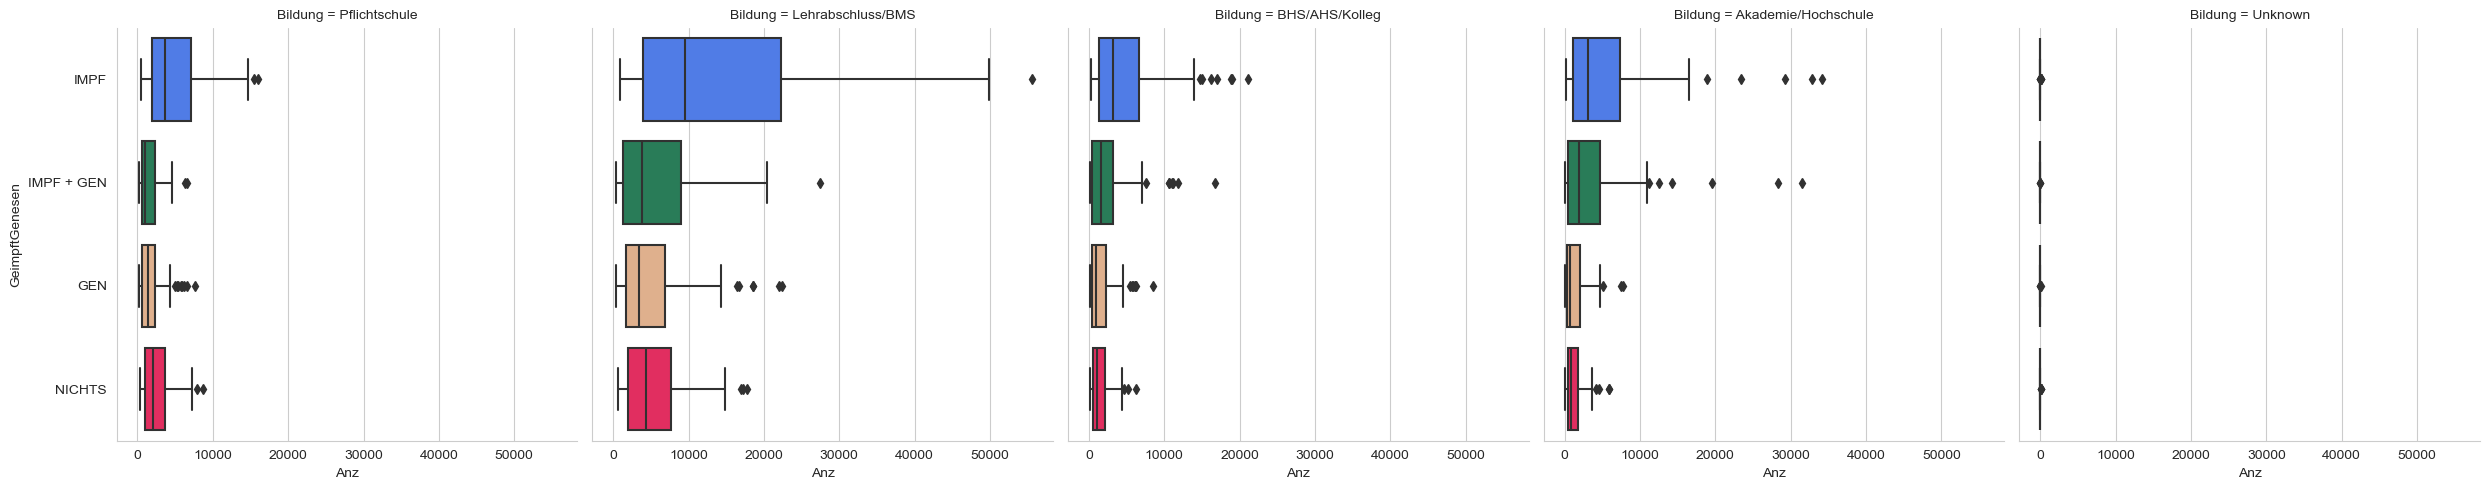

In [239]:
sns.catplot(data=korr2, kind="box", x="Anz", y="GeimpftGenesen", col="Bildung", orient="h", palette=cat_palette)

With all of these boxplots one can really get overwhelmed. Instead, we should simplify the feature ``Bildung``:

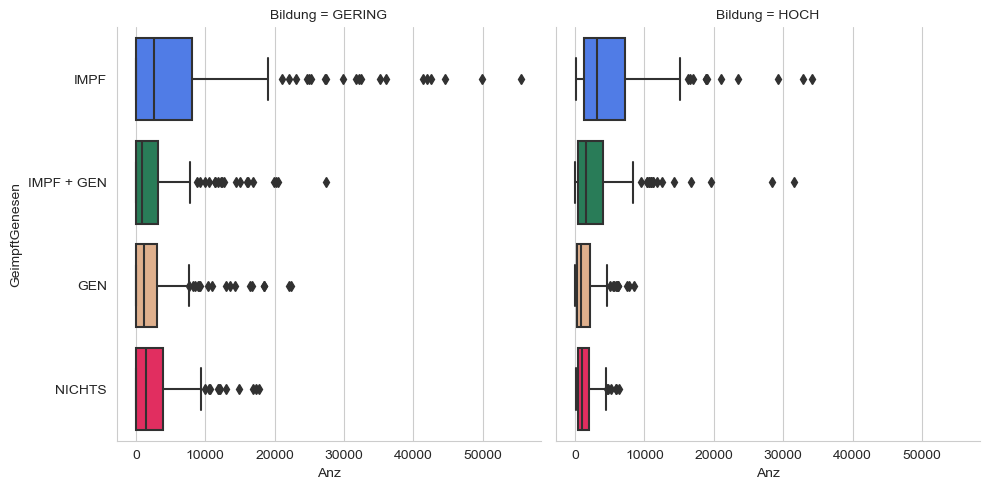

In [240]:
bildungDictToTemp = {"Unknown": "GERING", "Pflichtschule": "GERING", "Lehrabschluss/BMS": "GERING",
                     "BHS/AHS/Kolleg": "HOCH", "Akademie/Hochschule": "HOCH"}

temp2 = pd.DataFrame(korr2) #new instance
temp2["Bildung"] = temp2["Bildung"].map(bildungDictToTemp)

sns.catplot(data=temp2, kind="box", x="Anz", y="GeimpftGenesen", col="Bildung", orient="h", palette=cat_palette)

Well maybe our theory was wrong, These ranges look pretty evened out. Let's look at another theory of mine: Maybe the amount of vaccinated people is dependent on the economic status of a person.

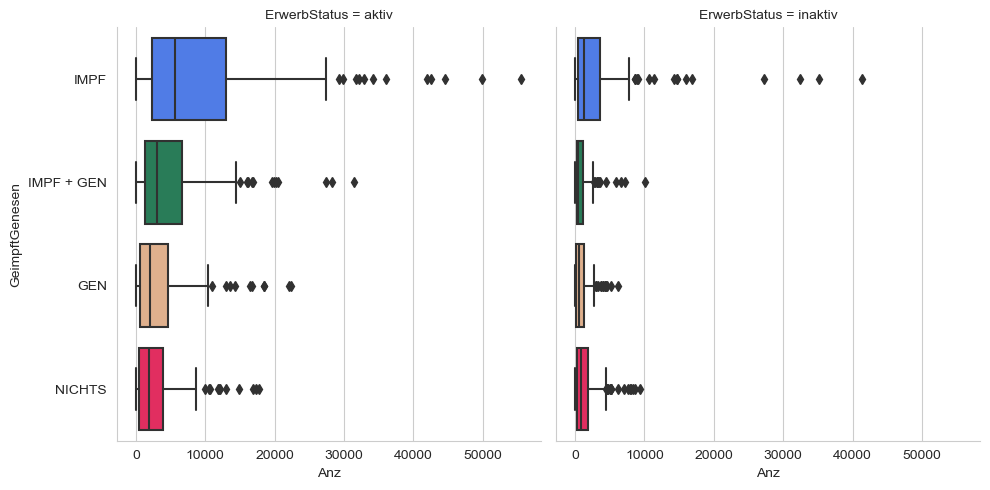

In [241]:
sns.catplot(data=korr2, kind="box", x="Anz", y="GeimpftGenesen", col="ErwerbStatus", orient="h", palette=cat_palette)

We can see here that more economically active people go vaccinating, are recovering, or both than economically inactive people. (There might also be a chance that there are more economically active people alltogether). What I really found interesting is, is that the range of ``NICHTS`` is slightly bigger than ``GEN`` when it comes to economically inactive people. To be a hundred percent sure whether there is a connection between vaccination and economic status, we can look at a violin plot.

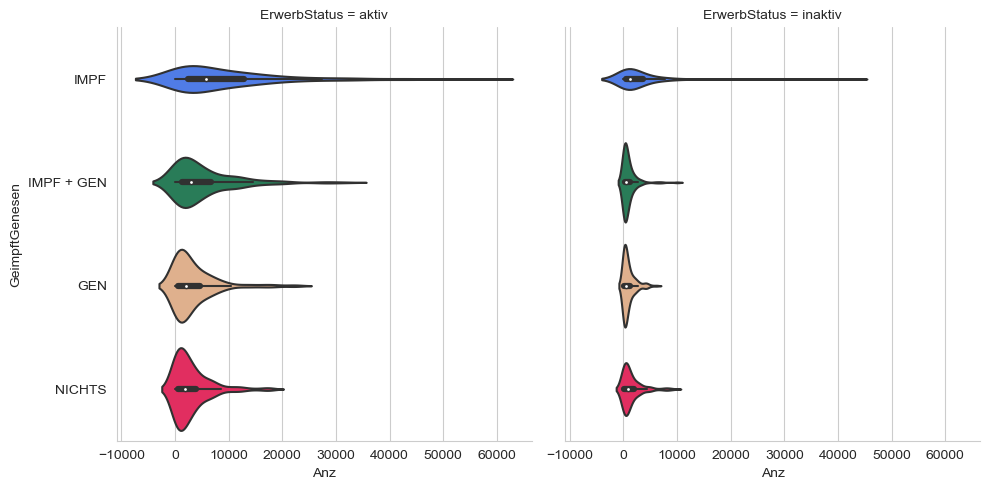

In [242]:
sns.catplot(data=korr2, kind="violin", x="Anz", y="GeimpftGenesen", col="ErwerbStatus", orient="h", palette=cat_palette)

If there was a higher density on the Blue violin plot when it comes to economically inactive people, we could say that there is an equal number of people but inactive ones choose not to vaccinate. Since the density is roughly the same, we can just say that there are more economically active people and have therefore a wider range in the boxplot.

Lastly, we would like to look at the ranges of the male/female population:

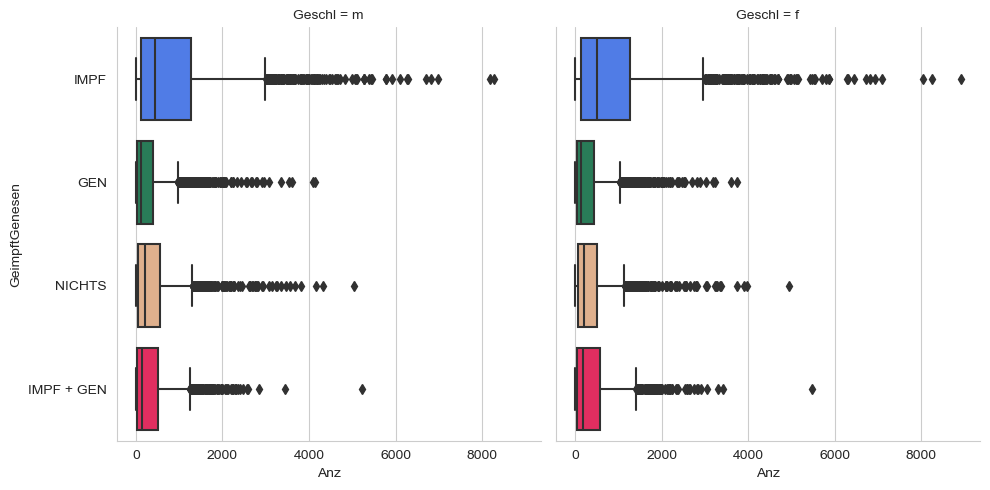

In [243]:
sns.catplot(data=korr1, kind="box", x="Anz", y="GeimpftGenesen", col="Geschl", orient="h", palette=cat_palette)

Well these ranges are evenly distributed amongst each group, too (boring...). But notice that there are so many outliers! Let's look at the density, too.

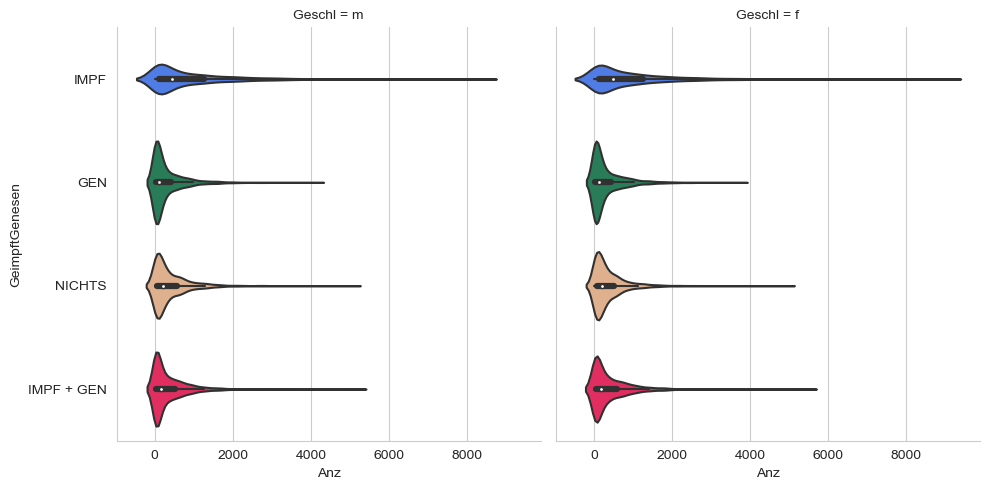

In [244]:
sns.catplot(data=korr1, kind="violin", x="Anz", y="GeimpftGenesen", col="Geschl", orient="h", palette=cat_palette)

Well we can say that there is an equal range regarding the two genders. Even the median values do not vary between these two categories!

## Barchart
Suppose we want to know how many people in each federal country is vaccinated:

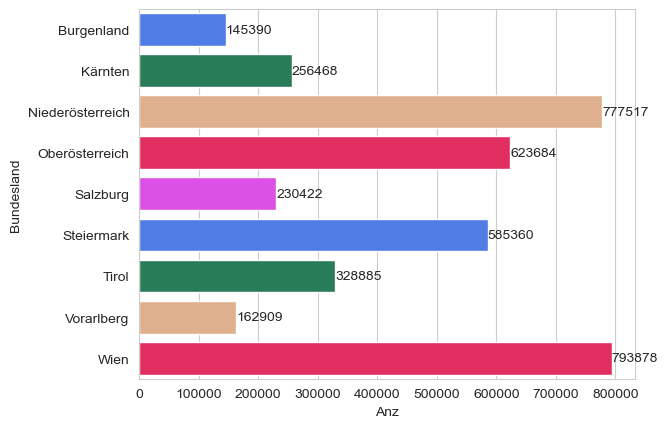

In [245]:
ax = sns.barplot(korr1.loc[korr1["GeimpftGenesen"] == "IMPF"], x="Anz", y="Bundesland", palette=cat_palette, orient="h", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Alright so we see that Vienna has the most vaccinated people and Burgenland has the least vaccinated people. Let's look at the age groups now:

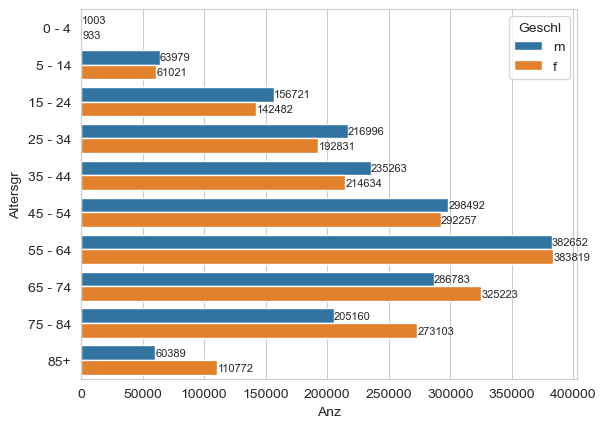

In [246]:
ax = sns.barplot(korr1.loc[korr1["GeimpftGenesen"] == "IMPF"], x="Anz", y="Altersgr", hue="Geschl", orient="h", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=8)
ax.bar_label(ax.containers[1], fontsize=8)
plt.show()

What is interesting is as the age groups get bigger (older), there are more female people getting vaccinated (Maybe because women live longer than men?).

## Transformation for future graphs
For our next analysis, we should transform our data so we have multiple values in one record. I think instead of one number ``Anz`` we should have number of vaccinated ``ImpfAnz``, number of recovered ``GenAnz``, number of vaccinated and recovered ``ImpfGenAnz``, and number of people that are not vaccinated nor recovered ``NichtsAnz``.

In [247]:
def transform_df2(row):
    result_row = row
    temp_df = korr2.loc[(korr2["Bundesland"] == row["Bundesland"]) &
                       (korr2["Bildung"] == row["Bildung"]) &
                       (korr2["Altersgr"] == row["Altersgr"]) &
                       (korr2["ErwerbStatus"] == row["ErwerbStatus"])]
    
    result_row["ImpfAnz"] = temp_df.loc[temp_df["GeimpftGenesen"] == "IMPF"]["Anz"].sum()
    result_row["GenAnz"] = temp_df.loc[temp_df["GeimpftGenesen"] == "GEN"]["Anz"].sum()
    result_row["ImpfGenAnz"] = temp_df.loc[temp_df["GeimpftGenesen"] == "IMPF + GEN"]["Anz"].sum()
    result_row["NichtsAnz"] = temp_df.loc[temp_df["GeimpftGenesen"] == "NICHTS"]["Anz"].sum()
    
    result_row.drop(["GeimpftGenesen", "Anz"], inplace=True)
    return result_row

transKorr2 = korr2.apply(transform_df2, axis=1).drop_duplicates()
transKorr2

,Bundesland,Bildung,Altersgr,ErwerbStatus,ImpfAnz,GenAnz,ImpfGenAnz,NichtsAnz
0,Burgenland,Pflichtschule,25 - 34,aktiv,611,396,285,472
4,Burgenland,Pflichtschule,25 - 34,inaktiv,471,303,173,456
8,Burgenland,Pflichtschule,35 - 44,aktiv,1170,532,597,531
12,Burgenland,Pflichtschule,35 - 44,inaktiv,549,253,199,425
16,Burgenland,Pflichtschule,45 - 54,aktiv,2010,575,932,688
...,...,...,...,...,...,...,...,...
1384,Wien,Unknown,35 - 44,inaktiv,46,23,15,47
1388,Wien,Unknown,45 - 54,aktiv,13,2,5,18
1392,Wien,Unknown,45 - 54,inaktiv,37,12,6,44
1396,Wien,Unknown,55 - 64,aktiv,5,1,2,14


Very well lets look at our pairplot once more:

C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

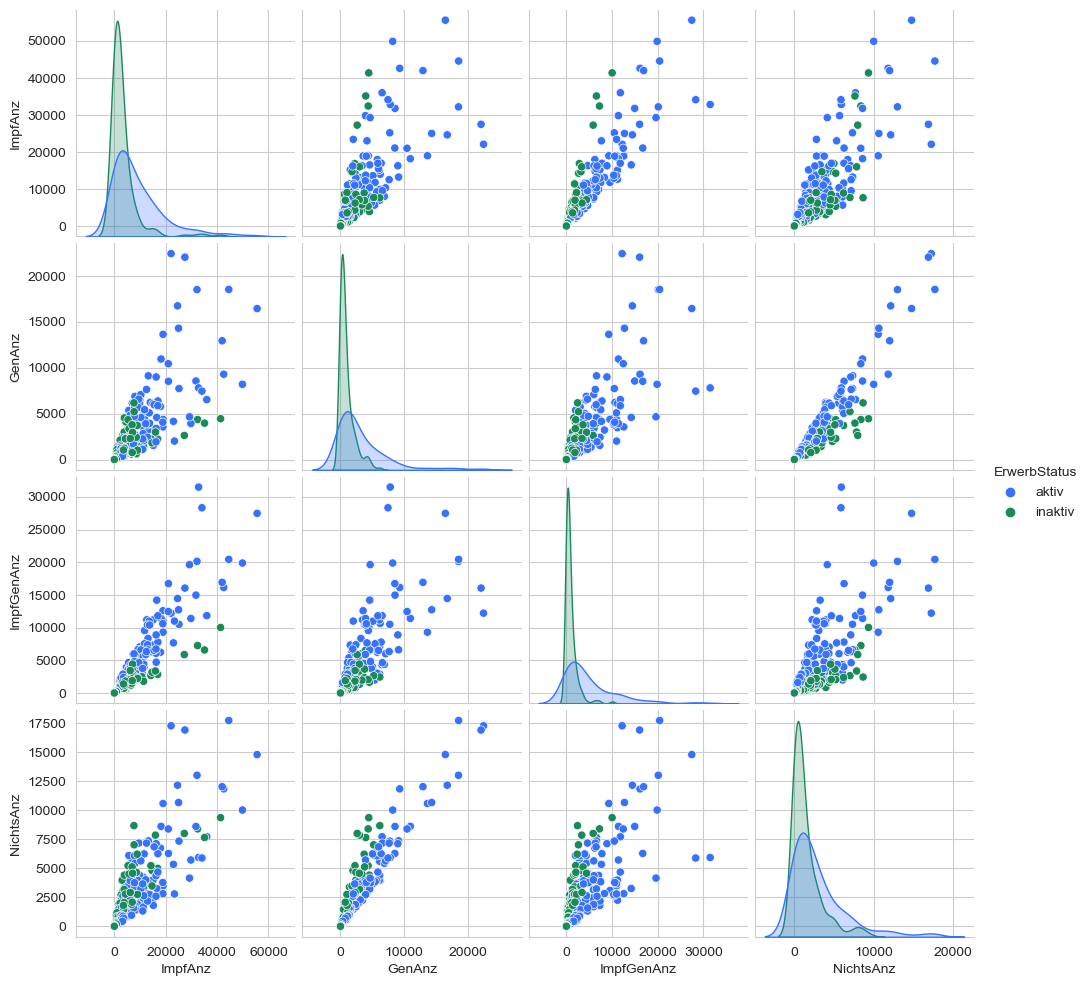

In [248]:
sns.pairplot(transKorr2, hue="ErwerbStatus", palette=cat_palette[0:2])
plt.show()

What really caught my attention here is the scatterplot between GenAnz and NichtsAnz. Let's take a closer look:
## Scatterplots

<Axes: xlabel='NichtsAnz', ylabel='GenAnz'>

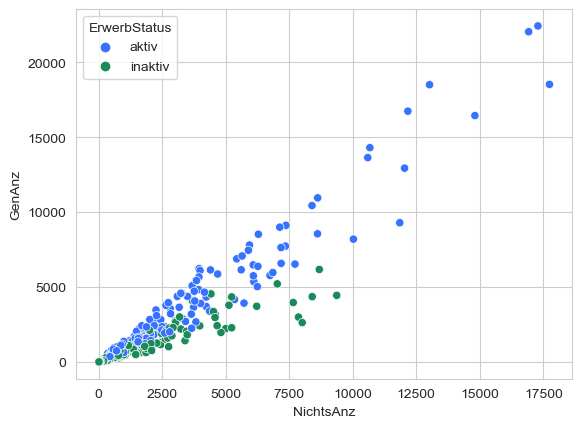

In [249]:
sns.scatterplot(data=transKorr2, x="NichtsAnz", y="GenAnz", hue="ErwerbStatus", palette=cat_palette[0:2])

What can we see here? Well, first of all, there is quite a bit of "density" in the bottom right corner. We can also see that there are clusters forming. So, can we say that, a recovered person is more likely to be economically active since all the blue dots are at the top? Well, not really. Economic status describes a "personal" feature. The problem is that GenAnz and NichtsAnz are both the number of people recovered, and so on. So both of these features are not personal features and therefore do not have an influence whether one is economically active or not. This is the case in all other scatterplots above

But we can estimate if a **person group** is economically active/inactive alltogether, depending on the amount of people that are recovered and the amount of people that are not vaccinated nor recovered (of course given that all of them have the same economic status). The question is of course, is there a reason we would like to know that (use case).

A **person group** is a group of people with the same personal features (economic status, educational status, federal country, ... except the features which count the amount of people in these person groups (e.g. ``ImpfAnz``))

## Histograms and KDEs (Kernel Density Estimation)
Histograms are often used to see how often a certain value-range occurs. So suppose we want to know what is the most likely value of vaccinated people given there is a certain *person group*. To estimate that, we need a histogram. As we have already seen in the scatterplots above, there is quite a density in some corners. Let's see if we can detect it with our histogram, too:

C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ImpfAnz', ylabel='Count'>

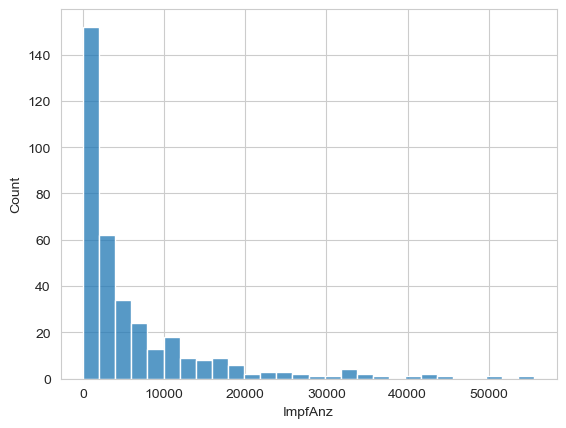

In [250]:
sns.histplot(data=transKorr2, x="ImpfAnz")

Wow, that's a huuge bump! What does this tell us? The amount of vaccinated people for a certain person group is pretty likely to be quite low. Now, let's also add a KDE to this graph:

C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ImpfAnz', ylabel='Count'>

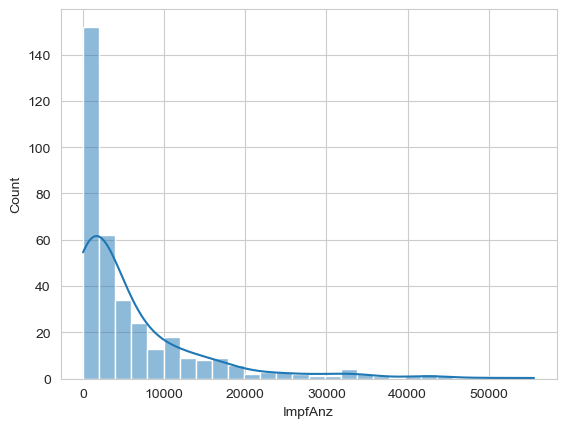

In [251]:
sns.histplot(data=transKorr2, x="ImpfAnz", kde=True)

We can also see the distribution of two features combined. This will look something like a heatmap but in reality it's just a fancy histogram:

C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ImpfAnz', ylabel='GenAnz'>

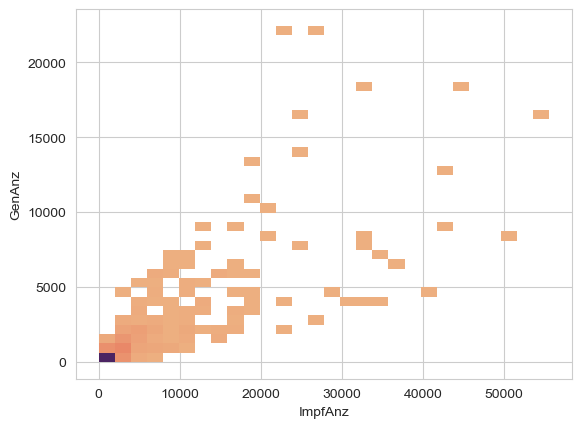

In [252]:
sns.histplot(data=transKorr2, x="ImpfAnz", y="GenAnz", cmap=cont_palette)

This surely looks like our scatterplot in our last pairplot! Let's add a KDE to this one and see what it looks like

C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ImpfAnz', ylabel='GenAnz'>

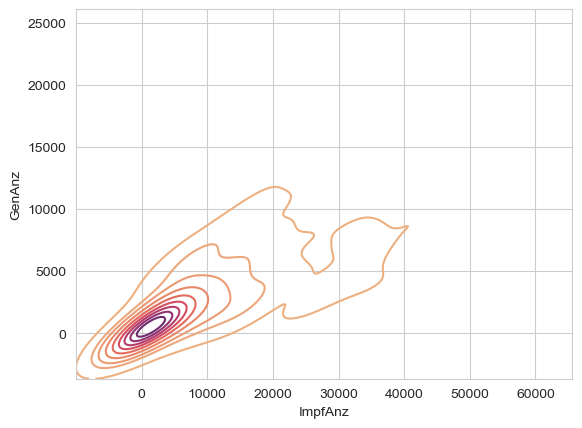

In [253]:
sns.kdeplot(data=transKorr2, x="ImpfAnz", y="GenAnz", cmap=cont_palette)

Let's compare these graphs with the distribution of ``ImpfGenAnz``. We should get approximately the same result, rigth?

C:\Users\yasin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ImpfGenAnz', ylabel='Count'>

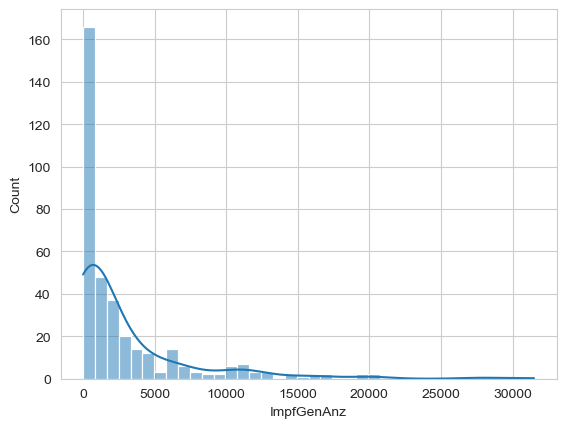

In [254]:
sns.histplot(data=transKorr2, x="ImpfGenAnz", kde=True)

Looking good!

## Correlation (again)
I am not pleased with the correlation chapter above, since our values were so separated. Should we create another heatmap now? But first we need to transform our num2 dataframe as we did for korr2:

In [255]:
def transform_num2(row):
    result_row = row
    temp_df = num2.loc[(num2["Bundesland"] == row["Bundesland"]) &
                       (num2["Bildung"] == row["Bildung"]) &
                       (num2["Altersgr"] == row["Altersgr"]) &
                       (num2["ErwerbStatus"] == row["ErwerbStatus"])]

    result_row["ImpfAnz"] = temp_df.loc[temp_df["GeimpftGenesen"] == 1]["Anz"].sum()
    result_row["GenAnz"] = temp_df.loc[temp_df["GeimpftGenesen"] == 2]["Anz"].sum()
    result_row["ImpfGenAnz"] = temp_df.loc[temp_df["GeimpftGenesen"] == 3]["Anz"].sum()
    result_row["NichtsAnz"] = temp_df.loc[temp_df["GeimpftGenesen"] == 0]["Anz"].sum()

    result_row.drop(["GeimpftGenesen", "Anz"], inplace=True)
    return result_row

transNum2 = num2.apply(transform_num2, axis=1)
transNum2.drop_duplicates(inplace=True)
transNum2

,Bundesland,Bildung,Altersgr,ErwerbStatus,ImpfAnz,GenAnz,ImpfGenAnz,NichtsAnz
0,1.0,1.0,29.5,1.0,611.0,396.0,285.0,472.0
4,1.0,1.0,29.5,0.0,471.0,303.0,173.0,456.0
8,1.0,1.0,39.5,1.0,1170.0,532.0,597.0,531.0
12,1.0,1.0,39.5,0.0,549.0,253.0,199.0,425.0
16,1.0,1.0,49.5,1.0,2010.0,575.0,932.0,688.0
...,...,...,...,...,...,...,...,...
1384,9.0,0.0,39.5,0.0,46.0,23.0,15.0,47.0
1388,9.0,0.0,49.5,1.0,13.0,2.0,5.0,18.0
1392,9.0,0.0,49.5,0.0,37.0,12.0,6.0,44.0
1396,9.0,0.0,59.5,1.0,5.0,1.0,2.0,14.0


Looking sharp! Now create the heatmap for correlation and...

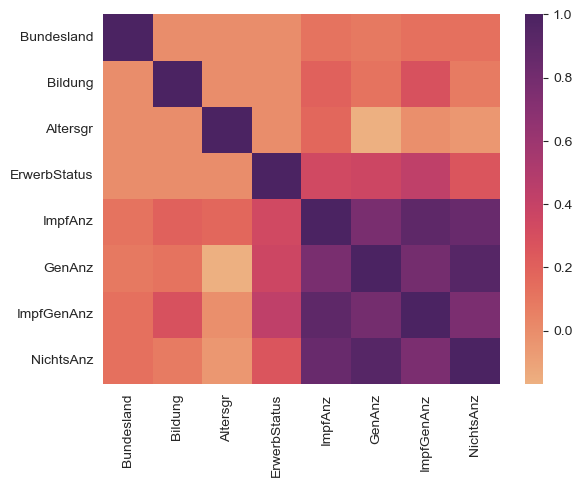

In [256]:
sns.heatmap(transNum2.corr(), cmap=cont_palette)
plt.show()

Haha! I knew it. We got something. Well the correlation between all the ``Anz``-Features is logical: The more people there is in a certain group, the more our values are going to get bigger. Therefore, when a certain ``Anz``-Feature is bigger, the othres are also bigger.

What I really found interesting here is, is that there is a slight correlation between ``Bildung`` (education) and ``ImpfAnz`` as well as ``ImpfGenAnz``. The interesting factor that connects both of these features is that both of these person groups are vaccinated (or chose not to vaccinate because of various reasons). What if we add up both of these features? Will we get a bigger correlation? Let's find out!

In [263]:
transNum2["Bildung"].corr(transNum2["ImpfAnz"])

0.19783150785477002

So this is the correlation between these two.

In [264]:
transNum2["Bildung"].corr(transNum2["ImpfGenAnz"])

0.28602770613668754

Alright, now let's see the result we get when we combine these two:

In [269]:
transNum2["Bildung"].corr(transNum2["ImpfGenAnz"] + transNum2["ImpfAnz"])

0.23316936946347694

Well that's kind of disappointing... Well at least I tried to prove our theory. Now we will look at something different: There is also a stronger correlation between ``ErwerbStatus`` and the ``Anz``-Features (especially ``ImpfGenAnz``). This could also be a hint that one is more likely to get vaccinated when they are economically active. We should inspect the certain correlation value:

In [270]:
transNum2["ErwerbStatus"].corr(transNum2["ImpfGenAnz"])

0.4331320158379753

And I don't think this correlation does not lack causality. To be able to be in the office without having to conduct COVID-tests every day, you needed to be either vaccinated or recovered from this disease.